In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
comments = pd.read_csv(r'C:\Users\Mica\Documents\Programming\5 Data Analysis Projects - Udemy\1-Youtube Text Data Analysis\GBcomments.csv', error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0

In [4]:
# Pip install textblob para hacer sentiment analysis

## Sentiment analysis

In [5]:
from textblob import TextBlob

In [6]:
TextBlob(r'Its more accurate to call it the M+ (1000) be...').sentiment.polarity

0.45000000000000007

In [7]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [8]:
comments.dropna(inplace=True) # Eliminamos comentarios NA

In [9]:
polarity = [] #Creamos una lista con los polarity de cada comentario

for i in comments['comment_text']:
    
    polarity.append(TextBlob(i).sentiment.polarity)

In [10]:
comments['polarity'] = polarity # Nueva columna para el df con los resultados

In [11]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

## Wordcloud

### Comentarios positivos

In [12]:
comments_positive = comments[comments['polarity'] >= 1]
comments_positive.head() # Separamos los comentarios positivos

video_id                                       comment_text  likes  \
4    jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26   jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80   jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158  YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175  YPVcg45W0z4                        Welcome to the Scandiworld!      0   

     replies  polarity  
4          0       1.0  
26         2       1.0  
80         1       1.0  
158        0       1.0  
175        0       1.0

In [13]:
from wordcloud import WordCloud, STOPWORDS 

In [14]:
stopwords = set(STOPWORDS) # Elimina las palabras vacias

In [15]:
total_comments = ' '.join(comments_positive['comment_text']) # Pasamos la list de comentarios a un texto unificado

In [16]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_comments) # Generamos el wordcloud

(-0.5, 999.5, 499.5, -0.5)

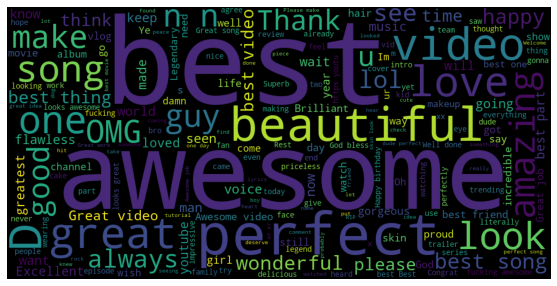

In [17]:
plt.figure(figsize=(15,5)) # Nueva figura y las medidas
plt.imshow(wordcloud) # Muestra la data como una imagen
plt.axis('off')

### Comentarios negativos

In [18]:
comments_negative = comments[comments['polarity'] <= -1]

In [19]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [20]:
wordcloud_2 = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_comments_negative)

(-0.5, 999.5, 499.5, -0.5)

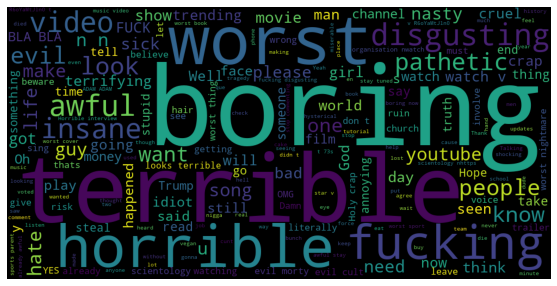

In [21]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud_2)
plt.axis('off')

## Analizando trending tags en YouTube

In [28]:
us_videos = pd.read_csv(r'C:\Users\Mica\Documents\Programming\5 Data Analysis Projects - Udemy\1-Youtube Text Data Analysis\USvideos.csv', error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [30]:
us_videos.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [32]:
all_tags = ' '.join(us_videos['tags'])

In [34]:
import re

In [37]:
tags = re.sub('[^a-zA-Z]', ' ', all_tags)
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [38]:
the_tags = re.sub(' +', ' ', tags)
the_tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

### Wordcloud

(-0.5, 999.5, 499.5, -0.5)

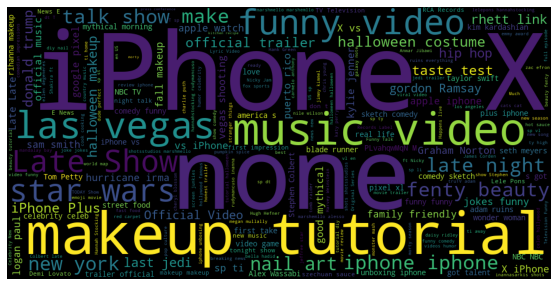

In [39]:
wordcloud = WordCloud(width=1000, height=500, stopwords=set(STOPWORDS)).generate(tags)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

### Analizando relaciones entre variables

#### Relación entre views y likes

Text(0.5, 1.0, 'Regression plot de views y likes')

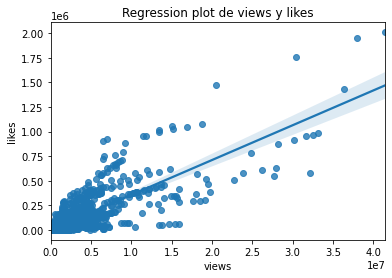

In [46]:
sns.regplot(data=us_videos, x='views', y='likes')
plt.title('Regression plot de views y likes')

#### Relación entre views y dislikes

Text(0.5, 1.0, 'Regression plot de views y dislikes')

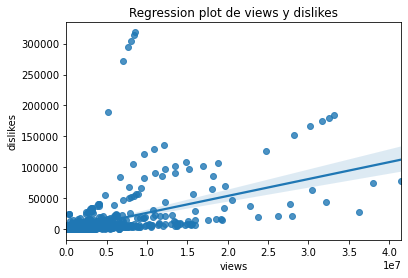

In [44]:
sns.regplot(data=us_videos, x='views', y='dislikes')
plt.title('Regression plot de views y dislikes')

### Heatmap

In [49]:
df_cor = us_videos[['views', 'likes', 'dislikes']]

In [51]:
df_cor.corr() # Funcoión para conocer la correlación

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

#### Mapa de calor que nos muestra la correlación entre variables

<AxesSubplot:>

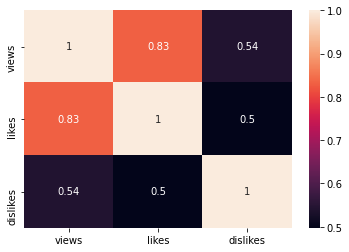

In [52]:
sns.heatmap(df_cor.corr(), annot=True)

## Emojis analysis

In [64]:
import emoji

In [67]:
comment = comments['comment_text'][1]

In [104]:
comments_ = comments['comment_text']
str = ''
for i in comments_:
    list = [c for c in i if c in emoji.UNICODE_EMOJI['en']]
    for ele in list:
        str = str + ele

In [105]:
str

'😂😂😂😭😭😭😢😢😢❤❤😂👏👇👇👇👇👇👇👇👇👇👇🌞😎😣😥😫😭✌😂👎🏻👎🏻👎🏻👎🏻😂🖕😘😘▶⏭⏮◀🔥🔥😊😊🤔🤔😂😂😂😂👏🏻👏🏻❤❤😜😍😍😅❤😍😍✌😂😂😂😊😂😂😂😂😏😏🇪🇸😭💔😊❤❤❤❤❤😂😂😊❤😂🤣✨🌈😘😂😂❤😊😂😊😂💗😂😊😊😊💖🐢😉😍😂😂💗💗😻😻❤😂😂❤❤🤗👌🏼👌🏼😂😂😂😂💖😩🙊♥♥♥😂😂😂💙💙💙💙💙💙😂😂😂❤❤❤😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😱😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😎😎😎😎😎😎😎😍😍😍😍😍😍😘😘😘😘😘😘😘😲🖕💪🤘💓☺☺😂😂😂💕😄😄😍💕😉😩❤❤💕❤😂💕😍💗👫💖😆💕💖💕😍😍😊😄😍😀💗🦄😍😊😂😊👍😍♥❤😂👶🏻🤗☺😘💙💙💙😍😍😊😎🤘🖤👌👌😍😂👌🍍😎😎😄😄😄😄😂😂😂😬💜💜💜😭😂😍😍💖😂😂😂😂😂😂😂😭😂😭😂😭😂😂😂😍😍😍😭😍😍😂👀👀🤔😂😂😂😂😂😂😂😂😂😂🍸🍸🍸🍸🍸😂😂😂🤣🤣🤣😂😂😂😂😍💜💜💜💜😂😂😂😅😂😍💖😂😻😉🔥❤😻❤😭😭😭😭😭😭😭👍🏻😍💚💙❤❤😫❤❤❤❤❤♥😍❤😊😍😎💄🐐😅😂😂😊😊👀👌🏽❤❤❤😂💖🎉💪💪🏽😎🙌🙌😜❤❤💛💛😎🙏💚🎉🎉❤🎉🎉🎉🎉🎊🎉🎊🎉😭💗😍😍😍😍😍😍😍👏✌😁❤❤😂💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕❤😍🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😊❤❤❤❤🍔🍟🇺🇸😒🌿😄😄😄😉🍲🍱🎏❤💪👊🏽😘😂😂😂❤🙋☺😍😍😚💕😉😂❤❤😊☺💓🌸🙄🙄🙄🙁😞😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😉👍🏻🔥💯🚨😊☺😂😂😂🤣🙂❤❤😀😀😀♥♥😂❤😂😓😭😂❤❤😖😖😂😂😂💗💝😘💐💐💐😂😍☺😂❤😭💕🙌🏽🙌🏽🙌🏽😘😘❤❤💖😫😖📱😂😏🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😁🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😎😂😂👍🏼💯💕♥♥♥😱😱😱❤❤❤😍😍😩😩😩😩😩😩😩😍😻😻😻😻😻😳🥀♥♥♥♥♥♥😍😍😍🙃😂💕💕💕😍💕💕❤❤💕😍🍫🌹💖🇸🇸🇸🇸❤😍👸🏿👸🏿👸🏿👸🏿👸🏿💗😊😊😩❤👌🏼😻😊😍❤😂😂👏🏼❤❤❤❤❤😍😍😍💚💚💚💚💚😍😭🌹😍❤😍😍😍💚💚💚💚💚😍💚💚💚☺💙😀😍💚😕😍👌😂😂😂😍👌🏻💗❤💚💚💚😸😙😙😘💚💚💚💚😍😭😭💖💓💓💓😍❤😘😘🤗🤗🤗❤😀😀💓💓💓❤😂❤😍❤❤♥♥♥❤🙌❤😂❤❤😍❤💜😍😭😍😍😍😊💗💕😍❤💗💗💛💛💛💖💖😍😐😍😍😍😍🗿😂🤗😩😩😩💖💖💖❤❤❤❤❤😍😍✨😍👍🏻😁😂😍💅❤😘❤❤😈👀😄😈👍☝👆✊👌✌👊✋👋👏👐👉👈💔😂😂😬😭😥☺😂😂😂😂😍😍😍😜😂😂😂😂😂😒👎🏽😱😱😱😱😂😎😛🙊✊✌😑😑😑👌😊

In [108]:
# Creamos un diccionario con la frecuencia de cada emoji
result = {}
for i in set(str):
    result[i] = str.count(i)
    
result

{'♍': 11,
 '🖖': 48,
 '🦎': 8,
 '🏰': 12,
 '🏮': 5,
 '↔': 5,
 '🚡': 12,
 '😧': 266,
 '↖': 5,
 '🌽': 46,
 '❌': 62,
 '🌵': 42,
 '🙂': 528,
 '🇩': 209,
 '🏳': 92,
 '🏔': 11,
 '🏡': 41,
 '↗': 14,
 '🍓': 240,
 '🛬': 4,
 '🤥': 21,
 '⏮': 6,
 '💗': 3071,
 '🤷': 329,
 '☂': 5,
 '🛎': 26,
 '⏱': 6,
 '🕋': 8,
 '👹': 89,
 '❤': 36780,
 '🤓': 187,
 '👚': 27,
 '💰': 247,
 '📓': 21,
 '😮': 596,
 '💒': 16,
 '✝': 64,
 '🔉': 13,
 '👋': 234,
 '🚊': 7,
 '🙌': 2734,
 '📺': 45,
 '📼': 11,
 '🇻': 52,
 '🆕': 6,
 '🥨': 1,
 'ℹ': 5,
 '📑': 8,
 '💯': 1796,
 '💃': 226,
 '🐠': 45,
 '💦': 399,
 '🌆': 8,
 '🧘': 2,
 '🥁': 17,
 '🤗': 1128,
 '💪': 1289,
 '🍒': 43,
 '🚥': 8,
 '💉': 24,
 '⬛': 153,
 '🚱': 7,
 '🎽': 9,
 '👞': 34,
 '🕺': 41,
 '🕥': 8,
 '🛌': 13,
 '💼': 22,
 '🏹': 8,
 '🛄': 6,
 '🌕': 34,
 '🌝': 53,
 '🌥': 6,
 '🛰': 7,
 '🏞': 8,
 '🖥': 15,
 '🕣': 7,
 '👷': 28,
 '👤': 28,
 '😞': 415,
 '🍞': 19,
 '☦': 4,
 '🙎': 12,
 '🎁': 106,
 '📗': 9,
 '📨': 8,
 '⚠': 81,
 '🏄': 15,
 '🙋': 430,
 '🎣': 27,
 '🚄': 6,
 '🔣': 5,
 '🐇': 41,
 '🔵': 803,
 '🦉': 7,
 '🙉': 49,
 '🔨': 33,
 '🦇': 6,
 '🖱': 11,
 '🌄': 17,
 '🌀'

In [139]:
# Ordenamos el diccionario
final={}
for key,value in sorted(result.items(),key =lambda item:item[1]):
    final[key]=value
    
final

{'🥨': 1,
 '🤾': 1,
 '🥜': 1,
 '🛷': 1,
 '🥡': 1,
 '🤽': 1,
 '🥚': 1,
 '🧠': 1,
 '🧤': 1,
 '🤺': 1,
 '🧣': 1,
 '🦓': 1,
 '🥌': 1,
 '🛒': 1,
 '🤹': 1,
 '🤟': 1,
 '🥟': 1,
 '🦏': 1,
 '🧘': 2,
 '🧛': 2,
 '🎌': 2,
 '🧢': 2,
 '🥅': 2,
 '🤱': 2,
 '🦔': 2,
 '🦕': 2,
 '🦖': 2,
 '🧒': 2,
 '🧡': 2,
 '🧝': 2,
 '🤫': 3,
 '🥄': 3,
 '🤨': 3,
 '🧐': 3,
 '🤯': 3,
 '🥖': 3,
 '🛬': 4,
 '☦': 4,
 '🖇': 4,
 '🗂': 4,
 '🤵': 4,
 '🏷': 4,
 '🛣': 4,
 '🗓': 4,
 '🏌': 4,
 '🛢': 4,
 '💹': 4,
 '🦍': 4,
 '⏹': 4,
 '⏲': 4,
 '⏸': 4,
 '🖍': 4,
 '☸': 4,
 '🗄': 4,
 '⏯': 4,
 '⏏': 4,
 '🦆': 4,
 '♾': 4,
 '🥞': 4,
 '🦐': 4,
 '⚗': 4,
 '♟': 4,
 '🧟': 4,
 '🥈': 4,
 '🥝': 4,
 '⚙': 4,
 '🤬': 4,
 '🏮': 5,
 '↔': 5,
 '↖': 5,
 '☂': 5,
 'ℹ': 5,
 '🔣': 5,
 '↪': 5,
 '⛏': 5,
 '🥉': 5,
 '🆔': 5,
 '🔤': 5,
 '❎': 5,
 'Ⓜ': 5,
 '♠': 5,
 '🈂': 5,
 '🈵': 5,
 '🔃': 5,
 '↩': 5,
 '🔂': 5,
 '🖊': 5,
 '🔖': 5,
 '◻': 5,
 '🕹': 5,
 '🚟': 5,
 '🔠': 5,
 '🚁': 5,
 '♦': 5,
 '🗃': 5,
 '🤮': 5,
 '㊙': 5,
 '↕': 5,
 '🚎': 5,
 '🚉': 5,
 '🈯': 5,
 '🔚': 5,
 '◽': 5,
 '🆎': 5,
 '🚻': 5,
 '✡': 5,
 '⛴': 5,
 '🈁': 5,
 '🚛': 5,
 '🔄': 5,
 '➿': 5,
 

In [144]:
# Convertimos el diccionario en una lista
keys=[*final.keys()]
values=[*final.values()]

keys
values

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


In [145]:
# Dataframe con nuestra data para poder representarla
df=pd.DataFrame({'chars':keys[-20:],'num':values[-20:]})
df

chars    num
0      🙌   2734
1      🏼   2961
2      💙   2968
3      💗   3071
4      👌   3534
5      💜   3616
6      🏻   4412
7      💖   4809
8      😊   4946
9      👏   5357
10     😬   5489
11     👍   5817
12     😘   6334
13     💕   6531
14     ♥   7173
15     😭   9098
16     🔥  10249
17     😍  34856
18     ❤  36780
19     😂  43947

In [146]:
import plotly.graph_objs as go
from plotly.offline import iplot

## Gráfico con emojis más usados

In [147]:
trace=go.Bar(
x=df['chars'],
y=df['num']
)
# 
iplot([trace])